## **Name: Yash Vardhan Sharma**
## **Registration Number: 19BCE1097**

Code of Academic Integrity

* I affirm that
* This work is my own original work and is not a borrowed work,

*   This work is my own original work and is not a borrowed work, either from other students or from assignments for other courses.

*   I have not given or received any unauthorized help on this assignment.

*   This submission is free from Plagiarism, Fabrication of facts, Unauthorized assistance, collusion

*   This submission gives proper credit to sources and references, acknowledges the contributions and ideas of others relevant to this academic work.

*   This submission was prepared by me fully adhering to the rules that govern this assignment regarding resource material, electronic aids, copying, collaborating with others, or engaging in any other behavior that subverts the purpose of the assignment and the directions of the teacher.



# **Lab Practice Sheet 4**


## Simple Linear Regression, Multiple Linear Regression(Gradient descent method)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression

### 4. Generate a dataset D with ‘make regression’ which has 1000 data-points and two input features. partition the dataset in to training data and test data in the ratio of 80:20. Use D to train multiple linear regression model(Batch Gradient Descent) with

In [ ]:
class batch_regressor:

  def __init__(self,X):    
    self.W = np.random.randn(X.shape[1],1)    
    

  def fit(self,X, y, learning_rate=0.1, numEpochs=2000):
    num_of_samples = len(X)    
    for epoch in range(numEpochs):      
      X, y = shuffle(X, y)
      delta = (X.T.dot(X.dot(self.W)-y.reshape(-1,1))/num_of_samples)        
      self.W = self.W - learning_rate * delta
      learning_rate = learning_rate/1.02
    
    return self.W
    
  def predict(self,X,W):
    return X.dot(W)

  def measure(self,y_predict,y_actual):
    return np.sqrt(mean_squared_error(y_predict, y_actual))

In [ ]:
def func_MLR5(D, Arr, size):
  X_traind, X_testd, y_traind, y_testd = train_test_split(Arr ,D['Y'], test_size=size, random_state=4)
  
  scaler = MinMaxScaler(feature_range=(0,1))
  X_train = scaler.fit_transform(X_traind)
  X_test = scaler.transform(X_testd)
  
  X_train_b = np.asarray(X_train)
  Y_train = np.asarray(y_traind)
  X_test_b = np.asarray(X_test)
  bgd = batch_regressor(X_train_b)
  
  w = bgd.fit(X_train_b,Y_train)
  predicted_train =bgd.predict(X_train_b,w)
  rmse_train = bgd.measure(predicted_train,Y_train)
  predicted_test =bgd.predict(X_test_b,w)
  rmse_test = bgd.measure(predicted_test,y_testd)
  print('For test data size', size*100)
  print('SDE train Error', rmse_train)
  print('SDE test Error', rmse_test)
  per = (rmse_train+rmse_test)/2
  print('Performane', per)
  print('\n')

#### a) A polynomial of degree 1 (with all the terms)

In [ ]:
variables, target = make_regression(n_samples=1000, n_features=1)
df = pd.DataFrame(variables)
df['target'] = target
df = df.set_axis(['X','Y'], axis=1, inplace=False)
Ones = np.ones(1000)
df.insert(0,'Bias',Ones)
df

,Bias,X,Y
0,1.0,0.574643,16.553724
1,1.0,1.480794,42.657170
2,1.0,0.963618,27.758919
3,1.0,0.679723,19.580764
4,1.0,-0.709927,-20.450842
...,...,...,...
995,1.0,0.725827,20.908861
996,1.0,0.052963,1.525692
997,1.0,1.106209,31.866507
998,1.0,1.168290,33.654897


In [ ]:
func_MLR5(df, np.asarray(df[['Bias','X']]), .20)

For test data size 20.0
SDE train Error 27.080556101964774
SDE test Error 26.617540383531004
Performane 26.84904824274789




#### b) A polynomial of degree 2 (with all the terms)

In [ ]:
variables2, target2 = make_regression(n_samples=1000, n_features=2)
df2 = pd.DataFrame(variables2)
df2['target2'] = target2
df2 = df2.set_axis(['X','X^2','Y'], axis=1, inplace=False)
Ones = np.ones(1000)
df2.insert(0,'Bias',Ones)
df2

,Bias,X,X^2,Y
0,1.0,0.372644,0.557586,51.610508
1,1.0,-0.783108,0.429697,-53.103855
2,1.0,2.640964,-0.432681,214.221845
3,1.0,-1.286907,-0.370757,-124.490623
4,1.0,1.059204,-1.867448,27.366335
...,...,...,...,...
995,1.0,-0.810681,0.348563,-58.301089
996,1.0,1.992582,0.355535,185.201620
997,1.0,0.082652,0.908038,38.559165
998,1.0,0.227548,0.344563,31.656124


In [ ]:
func_MLR5(df2, np.asarray(df2[['Bias','X','X^2']]), .20)

For test data size 20.0
SDE train Error 92.4968399276448
SDE test Error 88.2704747133279
Performane 90.38365732048635




#### c) A polynomial of degree 3 (with all the terms)

In [ ]:
variables3, target3 = make_regression(n_samples=1000, n_features=3)
df3 = pd.DataFrame(variables3)
df3['target3'] = target3
df3 = df3.set_axis(['X','X^2','X^3','Y'], axis=1, inplace=False)
Ones = np.ones(1000)
df3.insert(0,'Bias',Ones)
df3

,Bias,X,X^2,X^3,Y
0,1.0,0.344116,-0.380981,-0.928843,-29.643511
1,1.0,-1.586351,1.035871,-0.454752,-21.996124
2,1.0,-0.778447,-1.535797,1.274346,-135.063065
3,1.0,1.558475,-0.942666,-0.997694,-4.145483
4,1.0,-0.363036,1.153065,-0.929223,47.291719
...,...,...,...,...,...
995,1.0,0.198725,1.164364,-0.459037,90.856627
996,1.0,1.733288,-0.392959,1.175504,95.566333
997,1.0,-0.000989,1.408787,-1.787660,69.103410
998,1.0,-0.939564,-0.174418,2.120622,-21.381867


In [ ]:
func_MLR5(df3, np.asarray(df3[['Bias','X','X^2','X^3']]), .20)

For test data size 20.0
SDE train Error 93.1673634496944
SDE test Error 102.9768405981134
Performane 98.07210202390391




We can clearly observe that the polynomial of degree 2 has the highest value of performance of 109 and the lowest performance is the polynomial of degree 1 which is 30. Hence, the polynomial of degree 1 learns the best.

### 5. Generate a dataset D with ‘make regression’ (choose the noise parameter as zero) which has 1000 data points with two input features. Create a sequence of datasets D1,D2,D3,D4,D5 from D by injecting 20%, 40%, 60%,80% 0%,100% of noise respectively

In [ ]:
class sgd_regressor:

  def __init__(self,X):    
    self.W = np.random.randn(X.shape[1],1)    
    

  def fit(self,X, y, learning_rate=0.1, numEpochs=2000):
    num_of_samples = len(X)
    xbShuffled, yShuffled = shuffle(X, y)
    for epoch in range(numEpochs):
      
      for i in range(num_of_samples):        
        X = xbShuffled[i:i+1]
        yi = yShuffled[i:i+1]
        
        delta = X.T.dot(X.dot(self.W)-yi.reshape(-1,1))
                
        self.W = self.W - learning_rate * delta
      learning_rate = learning_rate/1.02
    return self.W
    
  def predict(self,X,W):
    return X.dot(W)

  def measure(self,y_predict,y_actual):
    return np.sqrt(mean_squared_error(y_predict, y_actual))

In [ ]:
data=make_regression(n_samples=1000, n_features=4, n_informative=2,n_targets=1,bias=0.0, effective_rank=None, noise=0.0, tail_strength=0.5, coef=False, shuffle=True, random_state=4)
D = pd.DataFrame(data[0],columns=['x'+str(i) for i in range(1,5)])
D['y'] = data[1]
D

,x1,x2,x3,x4,y
0,0.467241,-1.473583,-0.400955,0.122534,-8.233396
1,-0.562864,0.824745,0.067969,-0.451925,-32.668176
2,-1.135040,-0.703702,1.021038,-1.863831,-101.635163
3,-1.044241,-1.572799,-0.254212,0.070336,-5.800989
4,-1.282083,-0.252198,2.115736,-0.241259,75.468655
...,...,...,...,...,...
995,-0.095225,1.387069,1.649444,-0.031263,71.226014
996,-0.998075,-0.395259,1.968719,1.672906,220.131219
997,0.471661,1.200509,0.300600,0.695093,68.347315
998,-1.360243,-0.350150,-1.032448,-0.329359,-72.150524


In [ ]:
def noiseinduce(mu, sigma, D):
     noise = np.random.normal(mu, sigma,[1000,5])
     ret_df = D+noise
     return(ret_df)

In [ ]:
D1 = noiseinduce(0, 0.2, D)
D1

,x1,x2,x3,x4,y
0,0.567150,-1.667370,-0.492884,0.371571,-8.392709
1,-0.672347,0.955843,-0.116298,-0.540246,-32.899182
2,-0.842093,-0.704843,0.732768,-1.838283,-101.898239
3,-1.193139,-1.436363,-0.535512,-0.205308,-6.051714
4,-1.094264,-0.346609,1.866412,-0.266240,75.320322
...,...,...,...,...,...
995,-0.053538,1.273957,1.629617,0.032977,70.860732
996,-1.156957,-0.750717,2.343071,1.574448,220.271937
997,0.436772,1.344845,0.301349,0.975483,67.901933
998,-1.329372,-0.150073,-0.955337,-0.394892,-72.507827


In [ ]:
#Similarly
D2 = noiseinduce(0, 0.4, D)
D3 = noiseinduce(0, 0.6, D)
D4 = noiseinduce(0, 0.8, D)
D5 = noiseinduce(0, 1.0, D)

##### a) Using D,D1,D2,D3,D4,D5,D6 Train the ‘multiple linear regression model(Stochastic Gradient Descent)’ separately with a polynomial of degree 1. In each experiment , have the training data and the test in the ratio of 75:25.

In [ ]:
def func_MLR(D):
  X_traind, X_testd, y_traind, y_testd = train_test_split(np.asarray(D[['x1','x2','x3','x4']]),D['y'], test_size=0.25, random_state=4)
  
  scaler = MinMaxScaler(feature_range=(0,1))
  X_train = scaler.fit_transform(X_traind)
  X_test = scaler.transform(X_testd)
  
  X_train_b = np.asarray(X_train)
  Y_train = np.asarray(y_traind)
  X_test_b = np.asarray(X_test)
  sgd = sgd_regressor(X_train_b)
  
  w = sgd.fit(X_train_b,Y_train)
  predicted_train =sgd.predict(X_train_b,w)
  rmse_train = sgd.measure(predicted_train,Y_train)
  predicted_test =sgd.predict(X_test_b,w)
  rmse_test = sgd.measure(predicted_test,y_testd)
  return(rmse_train, rmse_test)

In [ ]:
kd1, ld1 = func_MLR(D1)
print('Training Mean Absolute Error', kd1)
print('Test Mean Absolute Error', ld1)

Training Mean Absolute Error 61.68758396253619
Test Mean Absolute Error 60.212554165981075


In [ ]:
kd2, ld2 = func_MLR(D2)
print('Training Mean Absolute Error', kd2)
print('Test Mean Absolute Error', ld2)

Training Mean Absolute Error 65.81119154592223
Test Mean Absolute Error 63.22884799797048


In [ ]:
kd3, ld3 = func_MLR(D3)
print('Training Mean Absolute Error', kd3)
print('Test Mean Absolute Error', ld3)

Training Mean Absolute Error 68.46788347318201
Test Mean Absolute Error 64.4916154543424


In [ ]:
kd4, ld4 = func_MLR(D4)
print('Training Mean Absolute Error', kd4)
print('Test Mean Absolute Error', ld4)

Training Mean Absolute Error 69.64652257288735
Test Mean Absolute Error 70.04117681549103


In [ ]:
kd5, ld5 = func_MLR(D5)
print('Training Mean Absolute Error', kd5)
print('Test Mean Absolute Error', ld5)

Training Mean Absolute Error 76.72457579825273
Test Mean Absolute Error 73.90408790600372


#### b) Compute the performance of the model as the average of the training data error and the test data error.

In [ ]:
p1=(kd1+ld1)/2
print('Performance in D1', p1)
p2 = (kd2+ld2)/2
print('Performance in D2', p2)
p3 = (kd3+ld3)/2
print('Performance in D3', p3)
p4 = (kd4+ld4)/2
print('Performance in D4', p4)
p5 = (kd5+ld5)/2
print('Performance in D5', p5)

Performance in D1 60.95006906425863
Performance in D2 64.52001977194635
Performance in D3 66.4797494637622
Performance in D4 69.84384969418919
Performance in D5 75.31433185212822


#### c) Plot the graph: noise vs error

In [ ]:
data = {'Noise': [.2, .4, .6, .8, 1], 'Error':[p1, p2, p3, p4, p5]}
df_graph = pd.DataFrame(data)
df_graph

,Noise,Error
0,0.2,60.950069
1,0.4,64.520020
2,0.6,66.479749
3,0.8,69.843850
4,1.0,75.314332


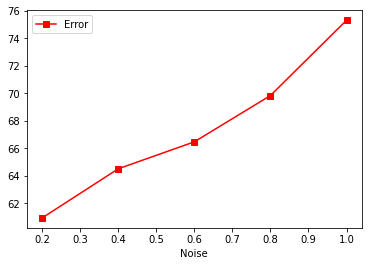

In [ ]:
df_graph.plot('Noise', 'Error', marker = 's' ,color = 'red')

#### d) Based on the results of the experiment, comment on the statement: ‘ more noise in the data set, less accuracy’

It is clear that the graph ploted above that as the noise increases the value of error also increases hence, the more the noise in the data the less is the accuracy.

### 8. Consider a dataset D which has two input features with 500 data points. You can either download a dataset or generate a synthetic dataset. Implement a multiple linear regression model (Stochastic Gradient Descent) and learn the curve that best fits the dataset, subject to the following condition

In [ ]:
variables, target = make_regression(n_samples=500, n_features=1)
df = pd.DataFrame(variables)
df['target'] = target
df = df.set_axis(['x','Y'], axis = 1, inplace = False)
df['x^2'] = df['x'].pow(2)
Ones = np.ones(500)
df.insert(0,'Bias',Ones)
df

,Bias,x,Y,x^2
0,1.0,-0.003470,-0.172244,0.000012
1,1.0,-1.719488,-85.360576,2.956640
2,1.0,-0.379030,-18.816174,0.143663
3,1.0,0.123249,6.118437,0.015190
4,1.0,-0.246640,-12.243960,0.060831
...,...,...,...,...
495,1.0,-1.472556,-73.102139,2.168423
496,1.0,-0.446351,-22.158215,0.199229
497,1.0,-0.164049,-8.143906,0.026912
498,1.0,-0.255920,-12.704639,0.065495


In [ ]:
class sgd_regressor:

  def __init__(self,X):    
    self.W = np.random.randn(X.shape[1],1)    
    

  def fit(self,X, y, learning_rate=0.1, numEpochs=2000):
    num_of_samples = len(X)
    xbShuffled, yShuffled = shuffle(X, y)
    for epoch in range(numEpochs):
      
      for i in range(num_of_samples):        
        X = xbShuffled[i:i+1]
        yi = yShuffled[i:i+1]
        
        delta = X.T.dot(X.dot(self.W)-yi.reshape(-1,1))
                
        self.W = self.W - learning_rate * delta
      learning_rate = learning_rate/1.02
    return self.W
    
  def predict(self,X,W):
    return X.dot(W)

  def measure(self,y_predict,y_actual):
    return np.sqrt(mean_squared_error(y_predict, y_actual))

In [ ]:
def func_MLR4(D, Arr, size):
  X_traind, X_testd, y_traind, y_testd = train_test_split(Arr ,D['Y'], test_size=size, random_state=4)
  
  scaler = MinMaxScaler(feature_range=(0,1))
  X_train = scaler.fit_transform(X_traind)
  X_test = scaler.transform(X_testd)
  
  X_train_b = np.asarray(X_train)
  Y_train = np.asarray(y_traind)
  X_test_b = np.asarray(X_test)
  sgd = sgd_regressor(X_train_b)
  
  w = sgd.fit(X_train_b,Y_train)
  predicted_train =sgd.predict(X_train_b,w)
  rmse_train = sgd.measure(predicted_train,Y_train)
  predicted_test =sgd.predict(X_test_b,w)
  rmse_test = sgd.measure(predicted_test,y_testd)
  print('For testing data size', size*100)
  print('SDE training Error', rmse_train)
  print('SDE testing Error', rmse_test)
  per = (rmse_train+rmse_test)/2
  print('Performane', per)
  print('\n')

In [ ]:
x = 0.3
while(x<= 0.7):
  func_MLR4(df, np.asarray(df[['Bias','x','x^2']]), x)
  x = round(x + 0.1, 1)

For testing data size 30.0
SDE training Error 46.066455372801094
SDE testing Error 56.04648758428665
Performane 51.05647147854387


For testing data size 40.0
SDE training Error 46.85079184492609
SDE testing Error 51.794463592098616
Performane 49.32262771851235


For testing data size 50.0
SDE training Error 47.200031163445026
SDE testing Error 50.2644396140177
Performane 48.73223538873136


For testing data size 60.0
SDE training Error 45.55467657816928
SDE testing Error 51.838156040021865
Performane 48.69641630909557


For testing data size 70.0
SDE training Error 46.69720294871339
SDE testing Error 50.1686143884938
Performane 48.432908668603595




Here if we compare the performance of all the 5 experiments under the hypothesis w0 + w1x + w2x^2. We can observe that the 3th experiment i.e., training : test = 50:50 has the highest value of performance and the 5th experiment i.e., training: test = 30:70 has the lowest value of performance. So, in our case we have seen that the dataset with more test data than training data gives the best performance our of all the others cases since the lower the value of performance the bettter. Also the performance shown by experiment 1-3 are almost identical.

### 9. Consider a dataset (of your choice) which has two input features and 1000 data points. Consider K=200. Train Multiple linear regression model (Mini-batch Gradient descent-with the size of mii-batch as 200 ) with a hypothesis (of your choice). Compute the performance measure of your mode

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Shush25/myDatasets/main/Toyota.csv",index_col=0,na_values=['??','???','????'])
df['Doors'] = df['Doors'].replace('three',3)
df['Doors'] = df['Doors'].replace('four',4)
df['Doors'] = df['Doors'].replace('five',5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Age'] = mean_imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]
df['KM'] = mean_imputer.fit_transform(df['KM'].values.reshape(-1,1))[:,0]
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['FuelType'] = mode_imputer.fit_transform(df['FuelType'].values.reshape(-1,1))[:,0]
df['MetColor'] = mode_imputer.fit_transform(df['MetColor'].values.reshape(-1,1))[:,0]
df['Doors'] = df['Doors'].astype(int)
df.HP = df['HP'].astype('float32')
df['HP'] = mean_imputer.fit_transform(df['HP'].values.reshape(-1,1))[:,0]

In [ ]:
# Droping column FuelType since It is non-numerical.
df.drop('FuelType', inplace = True, axis = 1)
df

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.000000,46986.000000,90.0,1.0,0,2000,3,1165
1,13750,23.000000,72937.000000,90.0,1.0,0,2000,3,1165
2,13950,24.000000,41711.000000,90.0,1.0,0,2000,3,1165
3,14950,26.000000,48000.000000,90.0,0.0,0,2000,3,1165
4,13750,30.000000,38500.000000,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,55.672156,20544.000000,86.0,1.0,0,1300,3,1025
1432,10845,72.000000,68647.239972,86.0,0.0,0,1300,3,1015
1433,8500,55.672156,17016.000000,86.0,0.0,0,1300,3,1015
1434,7250,70.000000,68647.239972,86.0,1.0,0,1300,3,1015


In [ ]:
df = df[:1000]
df.drop(['Age','HP','MetColor', 'Automatic','CC','Doors'], axis=1, inplace = True)
df

,Price,KM,Weight
0,13500,46986.0,1165
1,13750,72937.0,1165
2,13950,41711.0,1165
3,14950,48000.0,1165
4,13750,38500.0,1170
...,...,...,...
995,9950,42750.0,1050
996,9950,42102.0,1075
997,9950,41586.0,1114
998,9900,41200.0,1070


In [ ]:
class mini_batch_regressor:

  def __init__(self,X):    
    self.W = np.random.randn(X.shape[1],1)    
    

  def fit(self,X, y, learning_rate=0.1, numEpochs=2000, batchsize=200):    
    num_of_samples = len(X_test_b)
    
    for epoch in range(numEpochs):
      xbShuffled, yShuffled = shuffle(X, y)
      for i in range(0,num_of_samples,batchsize):        
        X = xbShuffled[i:i+batchsize]
        y = yShuffled[i:i+batchsize]
        if len(X)<batchsize:
          break        
        delta = 1/batchsize*X.T.dot(X.dot(self.W)-y.reshape(-1,1))                        
              
        self.W = self.W - learning_rate * delta    
      learning_rate = learning_rate/1.02  
    return self.W
    
  def predict(self,X,W):
    return X.dot(W)

  def measure(self,y_predict,y_actual):
    return np.sqrt(mean_squared_error(y_predict, y_actual))

In [ ]:
Ones = np.ones(1000)
df.insert(0,'Bias',Ones)
D = df 
Arr = np.asarray(df[['Bias','KM','Weight']])
size = 0.25
X_traind, X_testd, y_traind, y_testd = train_test_split(Arr ,D['Price'], test_size=size, random_state=4)

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_traind)
X_test = scaler.transform(X_testd)

X_train_b = np.asarray(X_train)
Y_train = np.asarray(y_traind)
X_test_b = np.asarray(X_test)
mgd = mini_batch_regressor(X_train_b)

w = mgd.fit(X_train_b,Y_train)
predicted_train =mgd.predict(X_train_b,w)
rmse_train = mgd.measure(predicted_train,Y_train)
predicted_test =mgd.predict(X_test_b,w)
rmse_test = mgd.measure(predicted_test,y_testd)
print('For test data size', size*100)
print('SDE train Error', rmse_train)
print('SDE test Error', rmse_test)
per = (rmse_train+rmse_test)/2
print('Performane', per)
print('\n')

For test data size 25.0
SDE train Error 12095.920094210265
SDE test Error 12319.994973815225
Performane 12207.957534012745




### 10. Download a real-time dataset which has a minimum of 500 datapoints and which could train a regression model. With D, Train a multiple linear regression model (Stochastic Gradient Descent) with polynomial of degree 1 (with all the terms), considering all the input features of the dataset . Compute the error due due to the test data set and the error due to training data set ( split the data set into training data : test data in the ratio 75:25) Also, predict the traget output for an unknown input

In [ ]:
D = pd.read_csv("https://raw.githubusercontent.com/Shush25/myDatasets/main/USA_Housing.csv")
D

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
D.drop(['Address'], axis =1, inplace = True)
D.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [ ]:
class sgd_regressor:

  def __init__(self,X):    
    self.W = np.random.randn(X.shape[1],1)    
    

  def fit(self,X, y, learning_rate=0.1, numEpochs=2000):
    num_of_samples = len(X)
    xbShuffled, yShuffled = shuffle(X, y)
    for epoch in range(numEpochs):
      
      for i in range(num_of_samples):        
        X = xbShuffled[i:i+1]
        yi = yShuffled[i:i+1]
        
        delta = X.T.dot(X.dot(self.W)-yi.reshape(-1,1))
                
        self.W = self.W - learning_rate * delta
      learning_rate = learning_rate/1.02
    return self.W
    
  def predict(self,X,W):
    return X.dot(W)

  def measure(self,y_predict,y_actual):
    return np.sqrt(mean_squared_error(y_predict, y_actual))

In [ ]:
X = D.drop(['Price'], axis = 1) # Every column except Price
Y = D['Price'] # Only Price Column
Ones = np.ones(X.shape[0])
X.insert(0,'Bias',Ones)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .25, random_state= 3)
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_b = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test_b = np.asarray(X_test)
sgd = sgd_regressor(X_train_b)
w = sgd.fit(X_train_b,Y_train)
print('weights is ',w)
predicted_train =sgd.predict(X_train_b,w)
rmse_train = sgd.measure(predicted_train,Y_train)
predicted_test =sgd.predict(X_test_b,w)
rmse_test = sgd.measure(predicted_test,Y_test)
print("training predicted error: ", rmse_train)
print("testing predicted error: ", rmse_test)

weights is  [[1.29292592e+00]
 [1.02767609e+06]
 [5.94643827e+05]
 [2.57770456e+05]
 [3.15236320e+04]
 [5.03353178e+05]]
training predicted error:  200679.773515383
testing predicted error:  202237.55105724244


In [ ]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(predicted_train, Y_train)
r2_score_test = r2_score(predicted_test, Y_test)
print('r2_ score for training dataset for multi linear reg : ', r2_score_train)
print('r2_ score for testing dataset for multi linear reg : ', r2_score_test)

r2_ score for training dataset for multi linear reg :  -0.37780496165338384
r2_ score for testing dataset for multi linear reg :  -0.46896101813295976


In [ ]:
sgd.predict(pd.DataFrame([[70000, 9, 7, 5, 1200000, 1000000]]),w)

,0
0,5.411963e+11
